In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data.csv')

In [3]:
dataset.head()

,CGPA,Did you do webdev during college time ?,Are you good at Data analysis ?,reading and writing skills,Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?,Role
0,8.0,NaN,no,excellent,no,no,yes,yes,no,no,no,no,yes,no,no,no,no,no,no,Developer
1,8.8,yes,no,poor,yes,no,NaN,no,no,no,no,yes,NaN,no,no,no,yes,no,no,ML engineer
2,7.9,no,no,poor,no,yes,no,no,yes,no,no,no,yes,yes,no,no,no,no,no,Management
3,8.0,yes,no,medium,yes,no,yes,yes,no,no,yes,no,no,no,no,no,no,no,yes,Developer
4,6.4,no,no,poor,no,yes,yes,no,yes,no,no,no,yes,no,no,no,no,yes,no,Marketing


In [4]:
dataset.shape

(516, 20)

In [5]:
missing_values_count = dataset.isnull().sum()
missing_values_count[:]

CGPA                                                    0
Did you do webdev during college time ?                 1
Are you good at Data analysis ?                         2
reading and writing skills                              2
Are you a tech person ?                                 0
Were you in a non tech society ?                        4
Are you good at coding ?                                2
Have you developed mobile apps ?                        2
Are you good at communication ?                         5
Do you have specialization in security                  3
Have you ever handled large databases ?                 3
Do you have knowlege of statistics and data science?    2
Are you proficient in English ?                         2
Have you ever managed some event?                       1
Do you write technical blogs ?                          1
Are you into marketing ?                                0
Are you a ML expert ?                                   0
Do you have a 

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.shape

(488, 20)

In [8]:
missing_values_count = dataset.isnull().sum()
missing_values_count[:]

CGPA                                                    0
Did you do webdev during college time ?                 0
Are you good at Data analysis ?                         0
reading and writing skills                              0
Are you a tech person ?                                 0
Were you in a non tech society ?                        0
Are you good at coding ?                                0
Have you developed mobile apps ?                        0
Are you good at communication ?                         0
Do you have specialization in security                  0
Have you ever handled large databases ?                 0
Do you have knowlege of statistics and data science?    0
Are you proficient in English ?                         0
Have you ever managed some event?                       0
Do you write technical blogs ?                          0
Are you into marketing ?                                0
Are you a ML expert ?                                   0
Do you have a 

In [9]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,19].values

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X[:, 0:1])
X[:,0:1] = imputer.transform(X[:,0:1])

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])

In [12]:
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

In [13]:
labelencoder_X = LabelEncoder()
X[:, 4] = labelencoder_X.fit_transform(X[:, 4])

In [14]:
labelencoder_X = LabelEncoder()
X[:, 5] = labelencoder_X.fit_transform(X[:, 5])

In [15]:
for i in range(6,19):
    labelencoder_X = LabelEncoder()
    X[:, i] = labelencoder_X.fit_transform(X[:, i])

In [16]:
X

array([[7.9, 0, 0, ..., 0, 0, 0],
       [8.0, 1, 0, ..., 0, 0, 1],
       [6.4, 0, 0, ..., 0, 1, 0],
       ...,
       [7.9, 1, 0, ..., 0, 1, 0],
       [8.5, 1, 1, ..., 1, 0, 0],
       [8.0, 1, 0, ..., 0, 0, 0]], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
columntransform_X = ColumnTransformer([("one", OneHotEncoder(), [3])],remainder='passthrough')

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = classifier.fit(X_train, Y_train)

In [21]:
Y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [23]:
cm

array([[ 8,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  5,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  4,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, 12,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  1,  1,  1,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2]], dtype=int64)

In [24]:
Y_pred.shape

(98,)

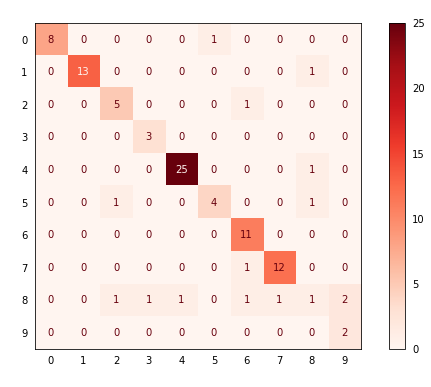

In [25]:
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(classifier, X_test, Y_test, cmap = plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color = 'white')
plt.xlabel('Predicted Label', color = 'white')
plt.ylabel('True Label', color = 'white')
plt.gcf().axes[0].tick_params(color = 'white')
plt.gcf().axes[1].tick_params(color = 'white')
plt.gcf().set_size_inches(10,6)
plt.show()

In [26]:
print(classifier.score(X_test, Y_test))

0.8571428571428571


In [27]:
import pickle
pickle.dump(classifier,open("careerPridiction.pkl","wb"))

In [28]:
md = pickle.load(open('careerPridiction.pkl', 'rb'))

In [29]:
input = np.array([9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
print(type(input))

<class 'numpy.ndarray'>


In [31]:
print(md.predict(input.reshape(-1,19)))

[4]


In [30]:
print(md.predict(input.reshape(-1,19))[0])

4
